In [1]:
import pymc as pm
import math

## Método de Monte Carlo

### Função escolhida: Distribuição de Cauchy Padrão
$f(x) = \frac{1}{\pi(1+x^2)}$

### Área a ser calculada

$\int_{0}^{0.77} \frac{1}{\pi(1+x^2)} \,dx = P(0 \leq X \leq 0.77)$

com $X \sim Cauchy(0,1)$

em que $\alpha = 0$ e $\beta = 1$

In [2]:
base = 0.77
altura = 1/math.pi
base, altura

(0.77, 0.3183098861837907)

In [3]:
with pm.Model() as model:
  X = pm.Uniform("X",0.1,base,shape=3000)
  Y = pm.Uniform("Y",0,altura,shape=3000)

In [4]:
model

In [5]:
with model:
  trace = pm.sample()

In [6]:
amostrasX = trace.posterior["X"].values[1][999]
amostrasY = trace.posterior["Y"].values[1][999]

In [7]:
pedras = list(zip(amostrasX,amostrasY))
len(pedras)

3000

In [8]:
def func(x):
  return 1/math.pi*(1+x**2)

In [9]:
ct = 0
for (x,y) in pedras:
  if (y <= func(x)):
    ct += 1

print(ct)

print(f"Area: {(base-0.1)*altura*ct/len(pedras)}")

3000
Area: 0.2132676237431398


In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot()

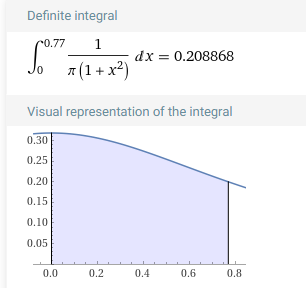